In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import re
import dateutil.parser
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [40]:
def Action(item):
    if 'Action' in item:
        return 1
    else:
        return 0
    
def Adventure(item):
    if 'Adventure' in item:
        return 1
    else:
        return 0
    
def Animation(item):
    if 'Animation' in item:
        return 1
    else:
        return 0
    
def Biography(item):
    if 'Biography' in item:
        return 1
    else:
        return 0
    
def Comedy(item):
    if 'Comedy' in item:
        return 1
    else:
        return 0
    
def Crime(item):
    if 'Crime' in item:
        return 1
    else:
        return 0
    
def Documentary(item):
    if 'Documentary' in item:
        return 1
    else:
        return 0
    
def Drama(item):
    if 'Drama' in item:
        return 1
    else:
        return 0
    
def Family(item):
    if 'Family' in item:
        return 1
    else:
        return 0
    
def Fantasy(item):
    if 'Fantasy' in item:
        return 1
    else:
        return 0
    
def History(item):
    if 'History' in item:
        return 1
    else:
        return 0    
    
def Horror(item):
    if 'Horror' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Musical(item):
    if 'Musical' in item:
        return 1
    else:
        return 0
    
def Mystery(item):
    if 'Mystery' in item:
        return 1
    else:
        return 0
    
def News(item):
    if 'News' in item:
        return 1
    else:
        return 0
    
def Romance(item):
    if 'Romance' in item:
        return 1
    else:
        return 0
    
def SciFi(item):
    if 'Sci-Fi' in item:
        return 1
    else:
        return 0

def Short(item):
    if 'Short' in item:
        return 1
    else:
        return 0
    
def Sport(item):
    if 'Sport' in item:
        return 1
    else:
        return 0
    
def Thriller(item):
    if 'Thriller' in item:
        return 1
    else:
        return 0

def War(item):
    if 'War' in item:
        return 1
    else:
        return 0
    
def Western(item):
    if 'Western' in item:
        return 1
    else:
        return 0


In [2]:
df1 = pd.read_pickle('Mv200x20.pkl')

In [3]:
df2 = pd.read_csv('Budgets.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 8 columns):
Movie_Title             2645 non-null object
Distributor             2645 non-null object
Domestic_Total_Gross    2645 non-null object
Budget                  1952 non-null object
Runtime(mins)           2571 non-null object
Rating                  2516 non-null object
Release_Date            2645 non-null datetime64[ns]
Genre                   2645 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 165.4+ KB


In [5]:
df2['Movie_Title'][1]

'<a href="/movie/Pirates-of-the-Caribbean-On-Stranger-Tides#tab=summary">Pirates of the Caribbean: On Stranger Tides</a>'

In [6]:
df2['Movie_Title'][1][df2['Movie_Title'][1].find('>')+1 : df2['Movie_Title'][1].find('<',5)]

'Pirates of the Caribbean: On Stranger Tides'

In [7]:
clean_titles = []
for i in range(len(df2['Movie_Title'])):
    clean_titles.append(df2['Movie_Title'][i][df2['Movie_Title'][i].find('>')+1 : df2['Movie_Title'][i].find('<',5)])

In [8]:
df2['Movie_Title'] = clean_titles

In [9]:
def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except :
        pass
df2['Budgets'] = df2['Budgets'].apply(money_to_int)
    

In [10]:
df = df1.merge(df2,'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 9 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null object
Budget                  1965 non-null object
Runtime(mins)           2584 non-null object
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
Budgets                 1246 non-null float64
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 207.7+ KB


In [11]:
df['Budget'] = pd.to_numeric(df['Budget'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 9 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null object
Budget                  1965 non-null float64
Runtime(mins)           2584 non-null object
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
Budgets                 1246 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 207.7+ KB


In [12]:
df.Budget.fillna(df.Budgets, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 9 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null object
Budget                  2115 non-null float64
Runtime(mins)           2584 non-null object
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
Budgets                 1246 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 207.7+ KB


In [14]:
dfbase = df.drop('Budgets',axis = 1)

In [60]:
dfbase['strpdate'] = pd.to_datetime(dfbase.Release_Date, format = "%Y-%M-%D")
dfbase['Year'] = pd.DatetimeIndex(dfbase['strpdate']).year

In [35]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 10 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null int64
Budget                  2115 non-null float64
Runtime(mins)           2584 non-null float64
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
strpdate                2659 non-null datetime64[ns]
year                    2659 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 308.5+ KB


In [29]:
dfbase['Runtime(mins)'] = pd.to_numeric(dfbase['Runtime(mins)'],errors='coerce')
dfbase['Domestic_Total_Gross'] = pd.to_numeric(dfbase['Domestic_Total_Gross'],errors='coerce')


In [17]:
#dfbase.duplicated().sum()

197

In [68]:
base2 = dfbase.copy()

In [69]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 11 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null int64
Budget                  2115 non-null float64
Runtime(mins)           2584 non-null float64
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
strpdate                2659 non-null datetime64[ns]
year                    2659 non-null int64
Year                    2659 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 249.3+ KB


In [70]:
base2['CPMin'] = base2['Budget']/base2['Runtime(mins)']
base2['Month'] = pd.DatetimeIndex(base2['strpdate']).month

In [71]:
base2['Month'] = pd.DatetimeIndex(base2['strpdate']).month

In [72]:
def Winter(item):
    if 0 < item < 4:
        return 1
    else:
        return 0
    
def Spring(item):
    if 3 < item < 7:
        return 1
    else:
        return 0    
    
def Summer(item):
    if 6 < item < 10:
        return 1
    else:
        return 0    

In [73]:
base2['Winter'] = base2['Month'].apply(Winter)
base2['Spring'] = base2['Month'].apply(Spring)
base2['Summer'] = base2['Month'].apply(Summer)

In [83]:
base2['Age'] = 2020 - base2['Year']

In [84]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 2658
Data columns (total 17 columns):
Movie_Title             2659 non-null object
Distributor             2659 non-null object
Domestic_Total_Gross    2659 non-null int64
Budget                  2115 non-null float64
Runtime(mins)           2584 non-null float64
Rating                  2530 non-null object
Release_Date            2659 non-null datetime64[ns]
Genre                   2659 non-null object
strpdate                2659 non-null datetime64[ns]
year                    2659 non-null int64
Year                    2659 non-null int64
CPMin                   2082 non-null float64
Month                   2659 non-null int64
Winter                  2659 non-null int64
Spring                  2659 non-null int64
Summer                  2659 non-null int64
Age                     2659 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(8), object(4)
memory usage: 373.9+ KB


In [85]:
base3 = base2.dropna()

In [86]:
base3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2656
Data columns (total 17 columns):
Movie_Title             2032 non-null object
Distributor             2032 non-null object
Domestic_Total_Gross    2032 non-null int64
Budget                  2032 non-null float64
Runtime(mins)           2032 non-null float64
Rating                  2032 non-null object
Release_Date            2032 non-null datetime64[ns]
Genre                   2032 non-null object
strpdate                2032 non-null datetime64[ns]
year                    2032 non-null int64
Year                    2032 non-null int64
CPMin                   2032 non-null float64
Month                   2032 non-null int64
Winter                  2032 non-null int64
Spring                  2032 non-null int64
Summer                  2032 non-null int64
Age                     2032 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(8), object(4)
memory usage: 285.8+ KB


In [154]:
lr = LinearRegression()
lr.fit(base3[['Budget','Runtime(mins)','Age']],base3['Domestic_Total_Gross'])
lr.score(base3[['Budget','Runtime(mins)','Age']],base3['Domestic_Total_Gross'])

0.4512214283015329

In [82]:
lr.coef_

array([ 2.24498742e+00, -2.62861684e+05, -1.27925747e+02])

In [91]:
lr = LinearRegression()
lr.fit(base3[['Budget','Runtime(mins)','CPMin','Age','Month','Winter','Spring','Summer']],base3['Domestic_Total_Gross'])
lr.score(base3[['Budget','Runtime(mins)','CPMin','Age','Month','Winter','Spring','Summer']],base3['Domestic_Total_Gross'])

0.4628716946329306

In [92]:
lr.coef_

array([ 2.22338628e+00, -2.89870482e+05, -1.28795508e+02, -9.85219387e+05,
        2.77072787e+06,  1.50413234e+07,  1.57425136e+07,  2.93439294e+06])

In [95]:
FeaturesBase = base3[['Budget','Runtime(mins)','CPMin','Age','Month','Winter','Spring','Summer']]

In [96]:
lr = LinearRegression()
p = PolynomialFeatures(degree=2)
lr.fit(p.fit_transform(FeaturesBase),base3['Domestic_Total_Gross'])
lr.score(p.transform(FeaturesBase),base3['Domestic_Total_Gross'])

0.20866243883994473

In [100]:
#p.get_feature_names()

In [98]:
lr.coef_

array([-5.62503154e+05, -3.23491252e+03,  1.19575954e+04, -1.29395697e+03,
        9.71868538e+02, -7.25201021e+03, -1.50645541e+03, -8.58053464e+03,
        1.15435077e+04,  1.04183697e-07, -1.27547770e-01, -2.36164682e-05,
        4.33935755e-02,  3.18932659e-01,  8.39085939e+00, -1.55592477e+00,
       -5.99643224e+00,  4.16560709e+03,  3.26265175e+03, -5.60099760e+03,
       -4.96711778e+03, -7.76228180e+04, -1.31936280e+05, -8.24040058e+04,
        1.33813136e-03, -5.84355060e+00, -4.52461822e+01, -1.03485720e+03,
        1.40523917e+02,  6.63455155e+02, -7.22588968e+02,  5.18610667e+04,
       -7.65419897e+04,  8.48017166e+04, -2.77245800e+04, -1.32064895e+05,
       -2.55712352e+03, -5.82222969e+03, -1.20873985e+04, -3.30026094e+02,
        0.00000000e+00,  0.00000000e+00, -8.13258454e+02,  0.00000000e+00,
       -9.55324521e+02])

In [153]:
#FeaturesBase

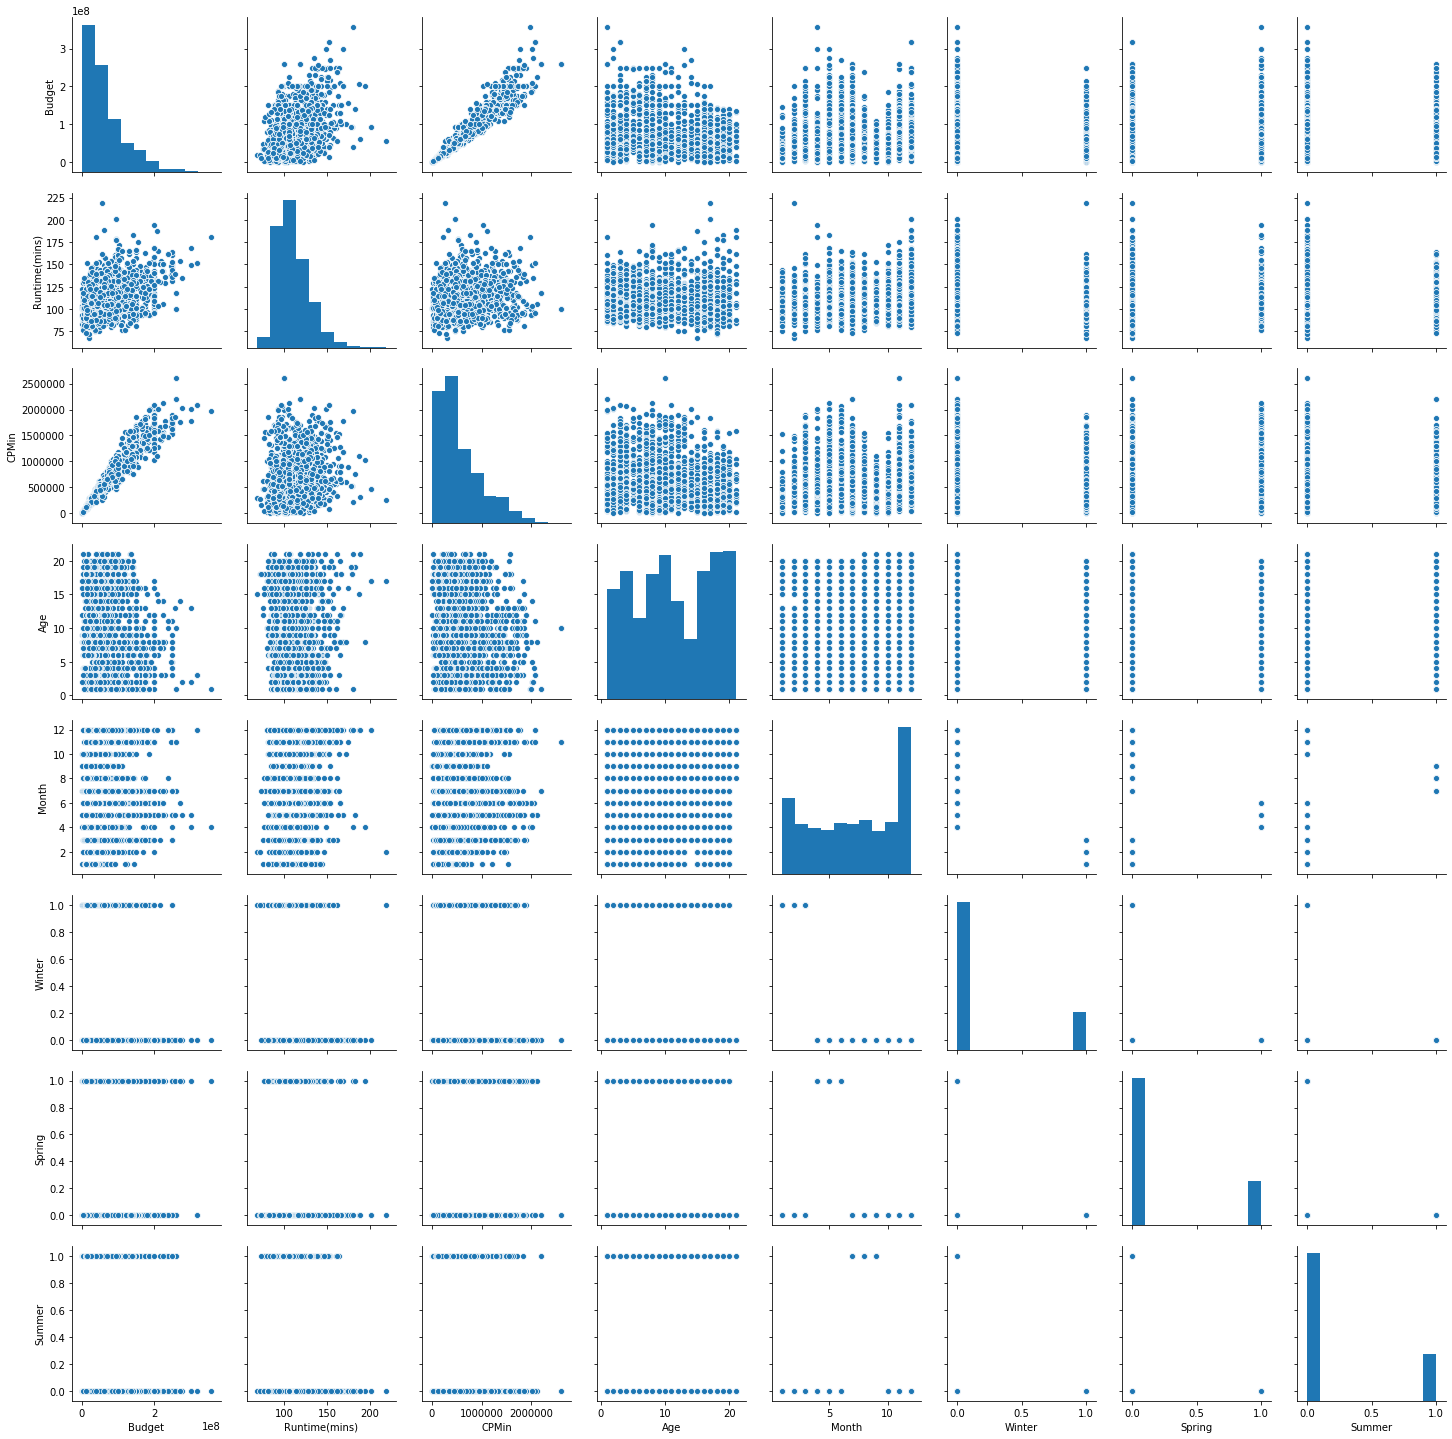

In [151]:
sns.pairplot(FeaturesBase)

In [38]:
Glist = list(base2['Genre'].str.split(' ', expand=True).stack().unique())
Glist2 = []
for item in Glist:
    Glist2.append(item.strip(','))
Glistset = list(set(Glist2))
Glistset.sort()
len(Glistset)

23

In [41]:
funclist = [Action, Adventure, Animation, Biography, Comedy, 
            Crime, Documentary, Drama, Family, Fantasy, History,
            Horror, Music, Musical, Mystery, News, Romance, 
            SciFi, Short, Sport, Thriller, War, Western]

In [103]:
basecategories = base3.copy()

In [104]:
#Creates all Genre Columns
for i in range(len(Glistset)):
        basecategories[Glistset[i]] = basecategories['Genre'].apply(funclist[i])
basecategories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2656
Data columns (total 40 columns):
Movie_Title             2032 non-null object
Distributor             2032 non-null object
Domestic_Total_Gross    2032 non-null int64
Budget                  2032 non-null float64
Runtime(mins)           2032 non-null float64
Rating                  2032 non-null object
Release_Date            2032 non-null datetime64[ns]
Genre                   2032 non-null object
strpdate                2032 non-null datetime64[ns]
year                    2032 non-null int64
Year                    2032 non-null int64
CPMin                   2032 non-null float64
Month                   2032 non-null int64
Winter                  2032 non-null int64
Spring                  2032 non-null int64
Summer                  2032 non-null int64
Age                     2032 non-null int64
Action                  2032 non-null int64
Adventure               2032 non-null int64
Animation               2032 

In [105]:
#Creasted all Dummies for Dist.
dist = pd.get_dummies(basecategories['Distributor'], drop_first=True)
basecategories1 = pd.concat([basecategories,dist],sort=False,join='outer',axis = 1)

In [152]:
#dist.info()

In [106]:
#Creasted all Dummies for Rating.
rate = pd.get_dummies(basecategories1['Rating'], drop_first=True)
basecategories2 = pd.concat([basecategories1,rate],sort=False,join='outer',axis = 1)

In [108]:
basecategories2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2656
Columns: 105 entries, Movie_Title to R
dtypes: datetime64[ns](2), float64(3), int64(31), object(4), uint8(65)
memory usage: 779.9+ KB


In [119]:
basecategories2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2656
Columns: 105 entries, Movie_Title to R
dtypes: datetime64[ns](2), float64(3), int64(31), object(4), uint8(65)
memory usage: 859.9+ KB


In [129]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
Everything = basecategories2.select_dtypes(include=numerics).drop('Domestic_Total_Gross',axis = 1)

In [130]:
Everything.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2656
Data columns (total 98 columns):
Budget                                   2032 non-null float64
Runtime(mins)                            2032 non-null float64
year                                     2032 non-null int64
Year                                     2032 non-null int64
CPMin                                    2032 non-null float64
Month                                    2032 non-null int64
Winter                                   2032 non-null int64
Spring                                   2032 non-null int64
Summer                                   2032 non-null int64
Age                                      2032 non-null int64
Action                                   2032 non-null int64
Adventure                                2032 non-null int64
Animation                                2032 non-null int64
Biography                                2032 non-null int64
Comedy                           

In [133]:
lr = LinearRegression()
p = PolynomialFeatures(degree=2)
lr.fit(p.fit_transform(Everything),basecategories2['Domestic_Total_Gross'])
lr.score(p.transform(Everything),basecategories2['Domestic_Total_Gross'])

0.5318769472475653

In [137]:
lr.coef_

array([-3.79151913e+05,  4.15067424e+02, -2.18403004e+03, ...,
        4.38700029e+01,  0.00000000e+00, -1.02157882e+02])

In [135]:
p.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',


In [157]:
lr = LinearRegression()
lr.fit(Everything, basecategories2['Domestic_Total_Gross'])
lr.score(Everything, basecategories2['Domestic_Total_Gross'])

0.5239840994662746

In [158]:
lr.coef_

array([ 2.20941772e+00,  2.34820360e+05,  3.80235894e+05,  3.80261047e+05,
       -1.54026896e+02,  1.98680725e+06,  1.23076100e+07,  1.20153122e+07,
        3.53870024e+06, -3.80260008e+05, -1.37981378e+07,  5.08386765e+06,
        3.54032167e+07, -1.17881824e+06,  2.64320197e+06, -1.30277183e+06,
        7.03015685e+06, -1.16332716e+07,  6.05584392e+06, -5.08564292e+06,
       -3.96874974e+07,  9.75026138e+05,  1.12528292e+07, -4.10242141e+06,
       -2.85276221e+06, -9.20146704e-07, -1.29449181e+07,  4.48362190e+06,
       -4.39584255e-07, -1.77998927e+07, -7.70318264e+06, -2.16224578e+07,
       -4.49687850e+07,  1.26620721e+07,  1.25717761e+07, -1.19822931e+07,
       -4.76292503e+07,  4.22919844e+06, -1.79035755e+06, -1.15560840e+07,
       -1.92717335e+07, -3.24631784e+07, -2.40595546e+07, -6.67491182e+05,
       -1.03699964e+07,  1.86692873e+07,  4.67643530e+07,  2.44718812e+07,
       -3.04168285e+07, -2.11074505e+06,  8.07170692e+06,  1.98157062e+05,
        5.48832192e+06,  

In [166]:
coefficient_info = pd.DataFrame(zip(Everything.columns, lr.coef_))#.to_csv('Coeffzip.csv')

In [169]:
coefficient_info[1].head()

0         2.209418
1    234820.359784
2    380235.893612
3    380261.046934
4      -154.026896
Name: 1, dtype: float64

In [181]:
coefficient_info['abs'] = abs(coefficient_info[1])

In [185]:
coefficient_info.sort_values('abs')

,0,1,abs
28,Short,-4.395843e-07,4.395843e-07
25,News,-9.201467e-07,9.201467e-07
0,Budget,2.209418e+00,2.209418e+00
4,CPMin,-1.540269e+02,1.540269e+02
51,Focus Features,1.981571e+05,1.981571e+05
...,...,...,...
46,DreamWorks,4.676435e+07,4.676435e+07
36,Annapurna Pictures,-4.762925e+07,4.762925e+07
91,Walt Disney Studios Motion Pictures,5.251052e+07,5.251052e+07
61,Newmarket Films,8.127722e+07,8.127722e+07


In [190]:
Everything2 = Everything.drop(['News','Short'],axis = 1)

In [191]:
lr = LinearRegression()
lr.fit(Everything2, basecategories2['Domestic_Total_Gross'])
lr.score(Everything2, basecategories2['Domestic_Total_Gross'])

0.5239840994662746

In [ ]:
0.5239840994662746

In [150]:
ridge_model = Ridge(alpha = .1)
ridge_model.fit(Everything, basecategories2['Domestic_Total_Gross'])
ridge_model.score(Everything, basecategories2['Domestic_Total_Gross'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22538e-20): result may not be accurate.
  overwrite_a=True).T


0.5239738493121546

In [149]:
#lr = LinearRegression()
#p = PolynomialFeatures(degree=2)
#lr.fit(p.fit_transform(Everything),basecategories2['Domestic_Total_Gross'])
#lr.score(p.transform(Everything),basecategories2['Domestic_Total_Gross'])

lasso_model = Lasso(alpha = .1)
lasso_model.fit(Everything, basecategories2['Domestic_Total_Gross'])
lasso_model.score(Everything, basecategories2['Domestic_Total_Gross'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.746715454001067e+18, tolerance: 1994435592145142.8
  positive)


0.5239840992094448

In [155]:
#alphavec = 10**np.linspace(-2,2,200)
#lasso_model = LassoCV(alphas = alphavec, cv=20)
#lasso_model.fit(Everything, basecategories2['Domestic_Total_Gross'])

In [156]:
#lasso_model.alpha
0.5239840994662746

In [142]:
lasso_model.coef_

array([ 2.20941773e+00,  2.34820415e+05, -5.39276037e+05, -0.00000000e+00,
       -1.54026894e+02,  1.98680308e+06,  1.23075706e+07,  1.20152864e+07,
        3.53868398e+06, -1.68003270e+06, -1.37981345e+07,  5.08386418e+06,
        3.54032146e+07, -1.17882494e+06,  2.64319868e+06, -1.30277068e+06,
        7.03014988e+06, -1.16332714e+07,  6.05581730e+06, -5.08563902e+06,
       -3.96874887e+07,  9.75023966e+05,  1.12528297e+07, -4.10241900e+06,
       -2.85276351e+06,  0.00000000e+00, -1.29449120e+07,  4.48362285e+06,
        0.00000000e+00, -1.77998844e+07, -7.70318163e+06, -2.16224638e+07,
       -4.49687748e+07,  1.26616172e+07,  1.25713877e+07, -1.19824467e+07,
       -4.76293939e+07,  4.22885658e+06, -1.79058516e+06, -1.15562761e+07,
       -1.92719334e+07, -3.24632259e+07, -2.40597583e+07, -6.67728414e+05,
       -1.03701534e+07,  1.86690132e+07,  4.67640872e+07,  2.44716125e+07,
       -3.04170087e+07, -2.11079851e+06,  8.07142611e+06,  1.97889856e+05,
        5.48786553e+06,  